In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
def sgd(x_values, y_values, alpha, epoch, batch_size):
    # initial values
    m, b = 0.5, 0.5
    error = []

    for _ in range(epoch):
        indexes = np.random.randint(0, len(x_values), batch_size)

        xs = np.take(x_values, indexes)
        ys = np.take(y_values, indexes)
        n = len(xs)

        f = (b + m * xs) - ys
        m += -alpha * 2 * xs.dot(f).sum() / n
        b += -alpha * 2 * f.sum() / n

        error.append(mean_squared_error(y, b+m*x))
    return m, b, error

In [4]:
def plot_regression(x_values, y_values, y_predictions):
    plt.figure(figsize=(8, 6))
    plt.title('Regression with Stochastic Gradient Descent (SGD)')
    plt.scatter(x_values, y_values, label='Data Points')
    plt.plot(x_values, y_predictions, c='#FFA35B', label='Regression')
    plt.legend(fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [6]:
def plot_mse(mse_values):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(mse_values)), mse_values)
    plt.title('Stochastic Gradient Descent Error')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.show()

Slope and intercept: 0.8046571372455403 - 0.5276280400551386
MSE: 0.7355713285634025


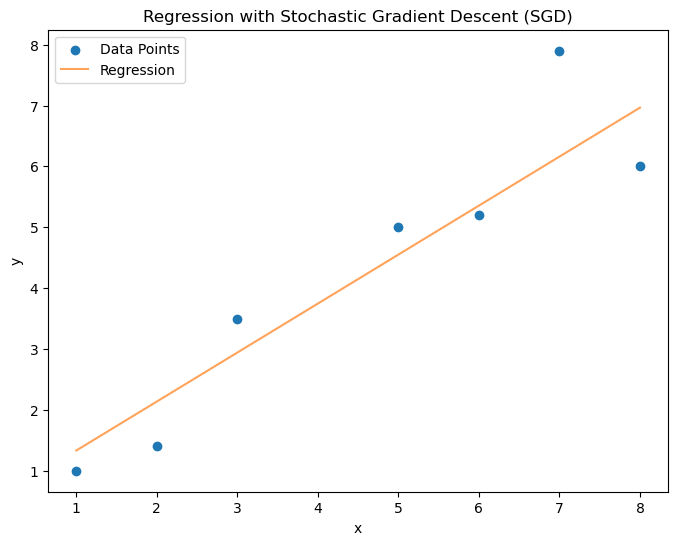

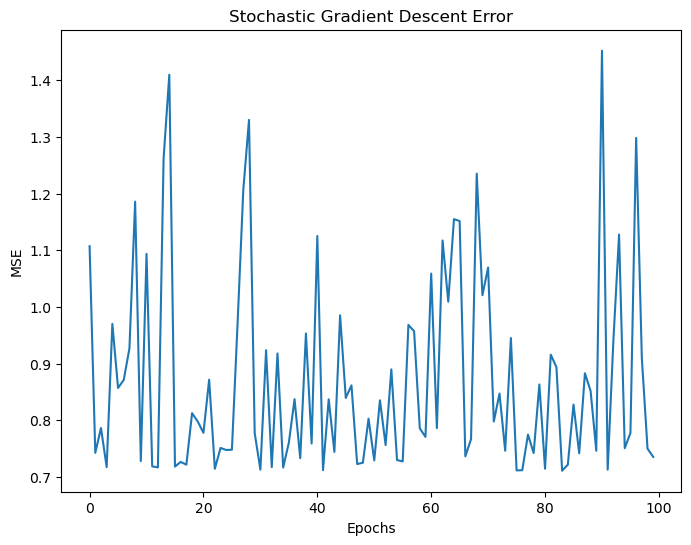

In [7]:
if __name__ == '__main__':
    x = pd.Series([1, 2, 3, 5, 6, 7, 8])
    y = pd.Series([1, 1.4, 3.5, 5, 5.2, 7.9, 6])

    slope, intercept, mses = sgd(x, y, alpha=0.01, epoch=100, batch_size=3)
    model_predictions = intercept + slope * x

    print('Slope and intercept: %s - %s' % (slope, intercept))
    print('MSE: %s' % mean_squared_error(y, model_predictions))
    plot_regression(x, y, model_predictions)
    plot_mse(mses)